In [3]:
 %pip install seaborn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('facebook_ads_data.csv')
df.head()

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


In [37]:
df['ad_date'] = pd.to_datetime(df['ad_date'])  

In [ ]:
#Daily Ad Spend Chart for 2021:

In [40]:
df_2021 = df[(df['ad_date'].dt.year == 2021)] 
daily_expenses = df_2021.groupby('ad_date')['total_spend'].sum()

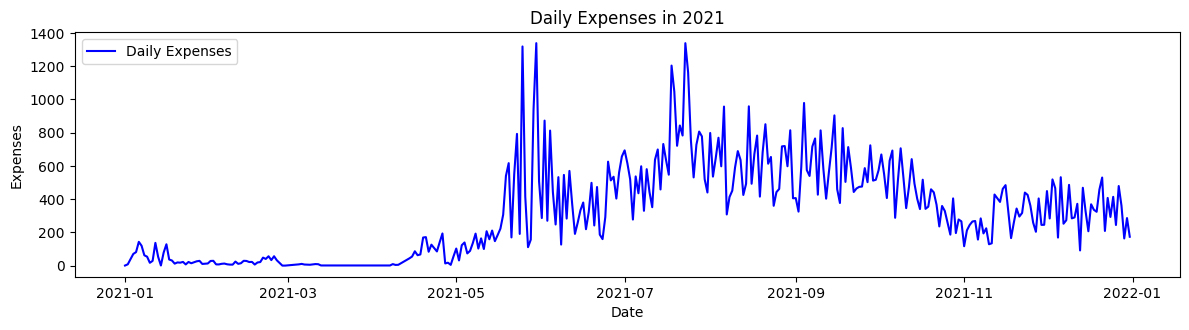

In [41]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)

plt.plot(daily_expenses.index, daily_expenses.values, label='Daily Expenses', color='blue')
plt.title('Daily Expenses in 2021')
plt.xlabel('Date')
plt.ylabel('Expenses')
plt.legend(loc='upper left')
plt.tight_layout() 
plt.show()

In [ ]:
#Daily ROMI Chart for 2021

In [42]:
daily_romi = df_2021.groupby('ad_date')['romi'].mean()

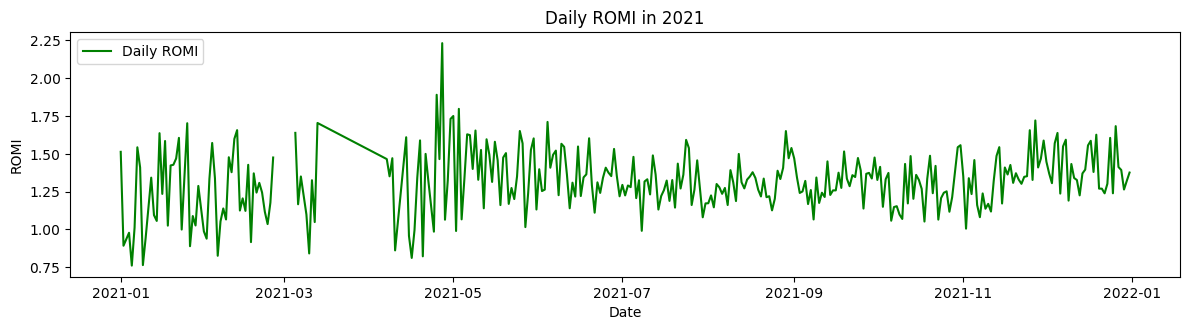

In [44]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 2)

plt.plot(daily_romi.index, daily_romi.values, label='Daily ROMI', color='green')
plt.title('Daily ROMI in 2021')
plt.xlabel('Date')
plt.ylabel('ROMI')
plt.legend(loc='upper left')

plt.tight_layout() 
plt.show()

In [ ]:
#Total Ad Spend Chart for Each Campaign

In [14]:
campaign_expenses = df.groupby('campaign_name')['total_spend'].sum()

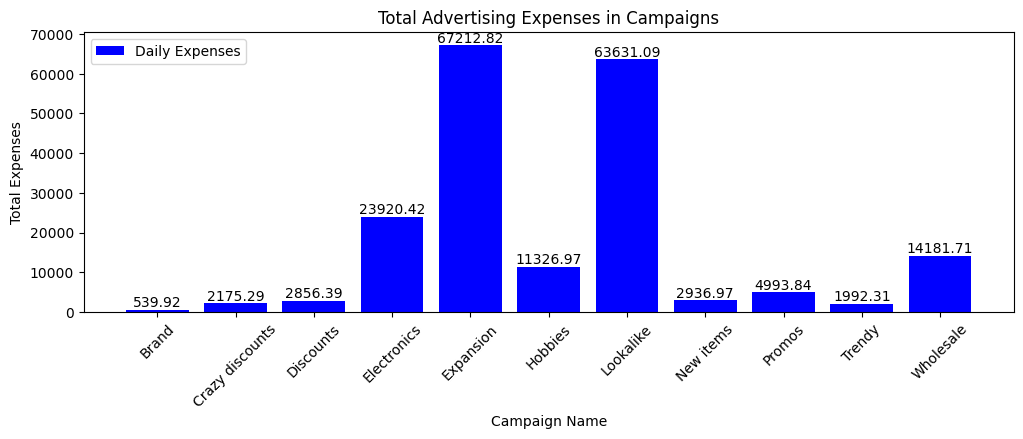

In [75]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 2)
plt.xticks(rotation=45) 

bars = plt.bar(campaign_expenses.index, campaign_expenses.values, label='Daily Expenses', color='blue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(round(height, 2)), ha='center', va='bottom')

plt.title('Total Advertising Expenses in Campaigns')
plt.xlabel('Campaign Name')
plt.ylabel('Total Expenses')
plt.legend(loc='upper left')


plt.show()


In [ ]:
#Overall Romi for Each Campaign

In [17]:
campaign_romi = df.groupby('campaign_name')['romi'].mean()

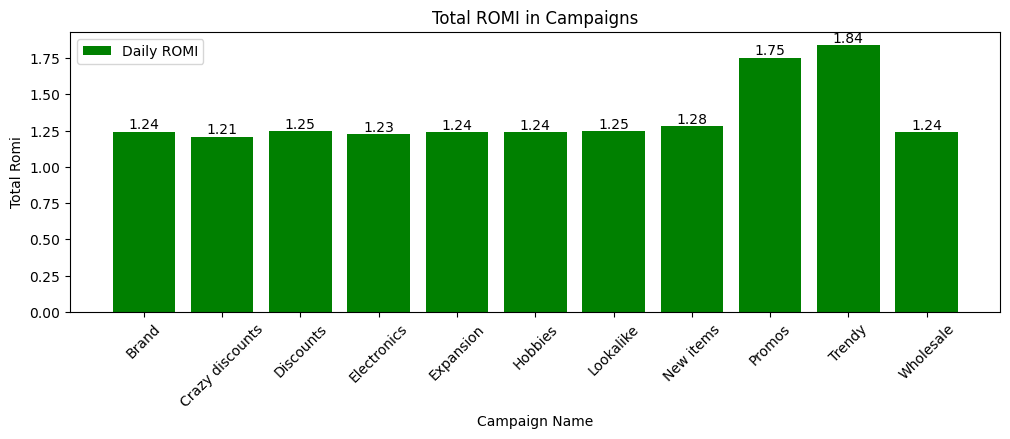

In [74]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 2)
plt.xticks(rotation=45) 

bars = plt.bar(campaign_romi.index, campaign_romi.values, label='Daily ROMI', color='green')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(round(height, 2)), ha='center', va='bottom')

plt.title('Total ROMI in Campaigns')
plt.xlabel('Campaign Name')
plt.ylabel('Total Romi')
plt.legend(loc='upper left')


plt.show()


In [ ]:
# Building a boxplot for daily ROMI in each company

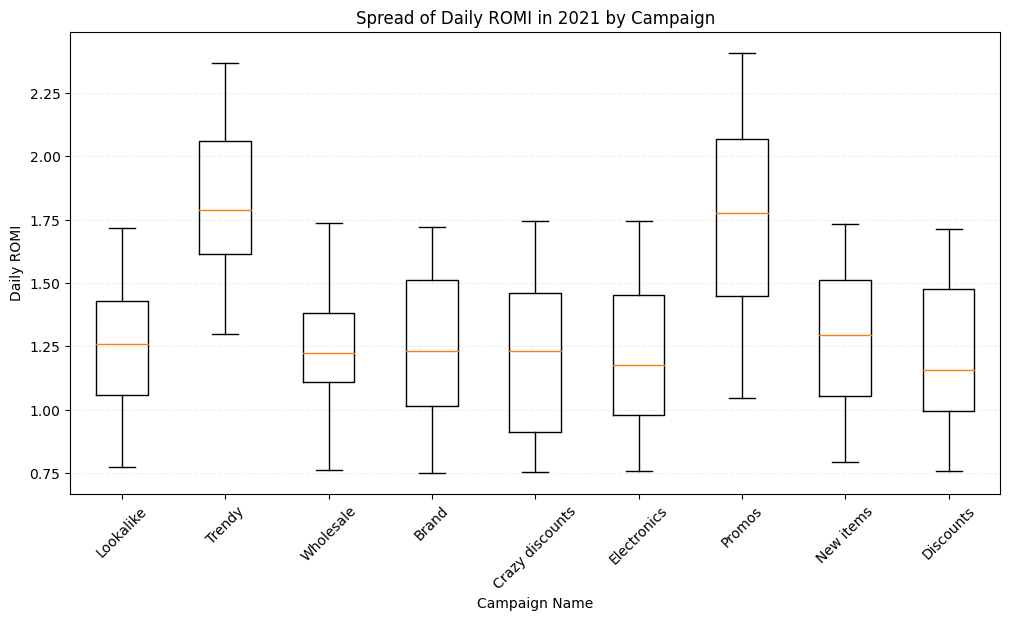

In [76]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45) 

plt.title('Spread of Daily ROMI in 2021 by Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('Daily ROMI')
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.boxplot([df_2021[df_2021['campaign_name'] == campaign]['romi'].dropna() for campaign in df_2021['campaign_name'].unique()], labels=df_2021['campaign_name'].unique())

plt.show()


In [ ]:
#ROMI Distribution Histogram

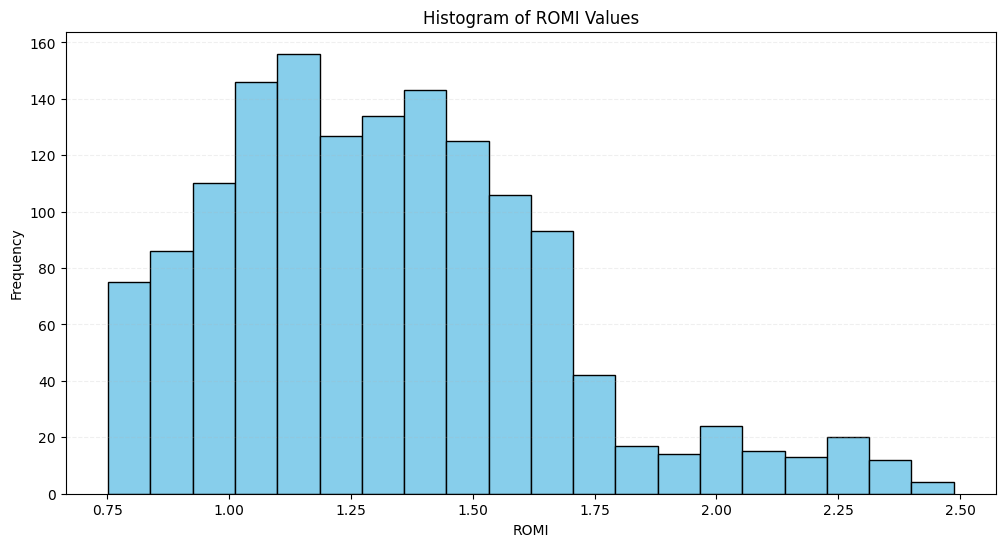

In [64]:
romi_values = df['romi']
plt.figure(figsize=(12, 6))
plt.hist(romi_values, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of ROMI Values')
plt.xlabel('ROMI')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.2)

plt.show()

In [ ]:
#Heatmap of the correlation between all numerical indicators in the table facebook_ads_data.csv.
#Which indicators have the highest and lowest correlation? What is "total_value" correlated with?

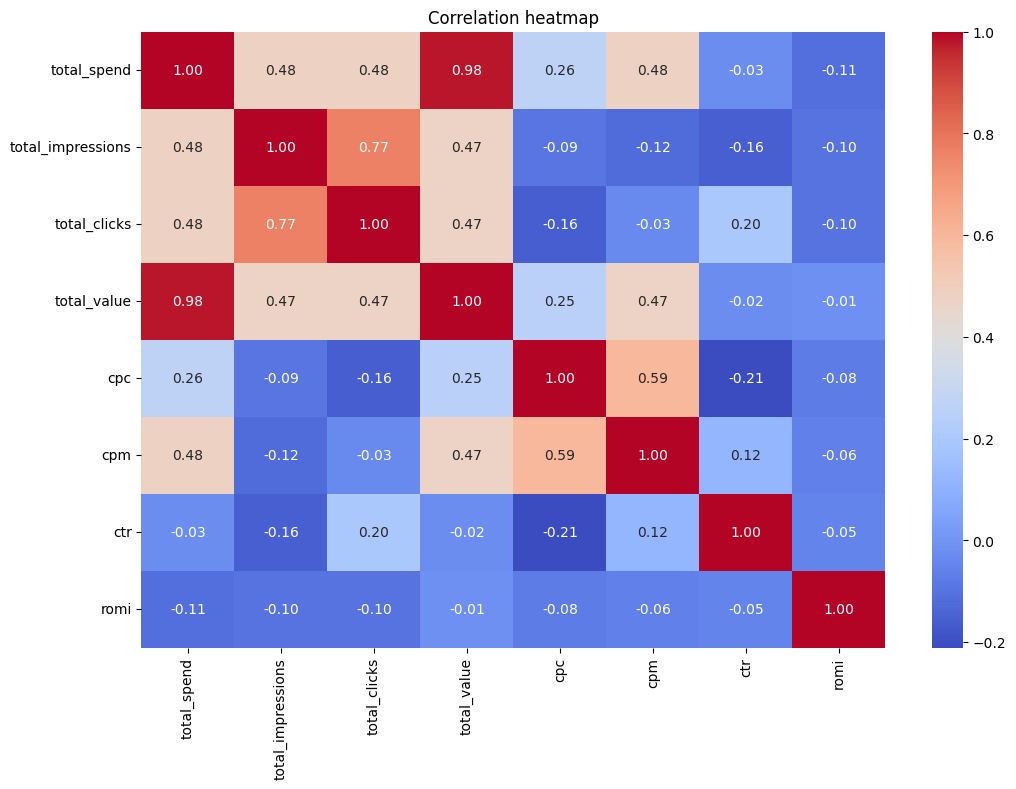

The indicator with the highest correlation is: ('total_spend', 'total_spend') = 1.00
The indicator with the lowest correlation is: ('cpc', 'ctr')= -0.21


In [53]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation heatmap')
plt.show()

# Indicator with the highest correlation
highest_corr = correlation_matrix.unstack().idxmax()
#
# Indicator with the lowest correlation
lowest_corr = correlation_matrix.unstack().idxmin()

print(f"The indicator with the highest correlation is: {highest_corr} = {correlation_matrix[highest_corr[0]][highest_corr[1]]:.2f}")
print(f"The indicator with the lowest correlation is: {lowest_corr_indicator}= {correlation_matrix[lowest_corr[0]][lowest_corr[1]]:.2f}")

In [ ]:
#Scatter Plot with linear regression which is built on data from "total_spend" and "total_value" 
#to visualize the relationship between these values.

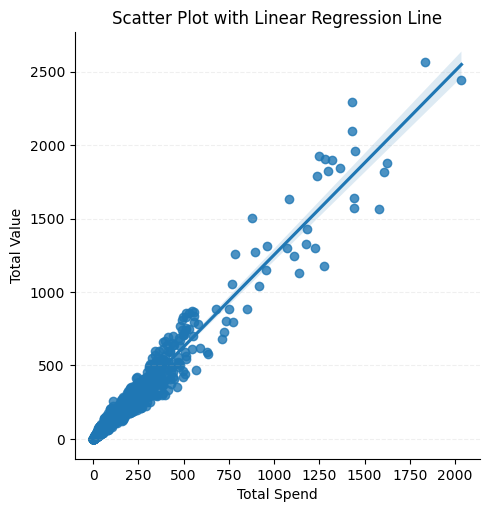

In [65]:
sns.lmplot(x='total_spend', y='total_value', data=df)
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.title('Scatter Plot with Linear Regression Line')
plt.xlabel('Total Spend')
plt.ylabel('Total Value')
plt.show()